## Comptage des voyageurs montants dans les trains Transilien (WIP)
Source : https://data.iledefrance.fr/explore/dataset/voyageurs-montant-en-gare-sur-le-reseau-transilien/information/

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
trains = pd.read_csv("../Datasets_training/voyageurs_trains.csv", sep=";")

In [9]:
noms_gares = pd.read_csv('referentiel-gares-voyageurs.csv', sep=";")

In [10]:
trains.head()

,Nom gare,Code Gare,Type jour,Year,Date de comptage,Ligne,Tranche horaire,Montants
0,ACHERES GRAND CORMIER,87386052,Samedi,2014.0,2014-05-17,A,De 16h à 20h,46
1,ACHERES GRAND CORMIER,87386052,JOB,2018.0,2018-03-27,A,De 6h à 10h,113
2,SAINT-QUENTIN EN YVELINES,87393843,JOB,2016.0,2016-03-15,U,De 6h à 10h,2493
3,MAISONS LAFFITTE,87386425,Dimanche,2014.0,2014-05-18,A,De 10h à 16h,1884
4,LA DEFENSE GRANDE ARCHE,87758011,JOB,2016.0,2016-03-15,U,De 6h à 10h,3831


In [22]:
noms_gares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 26 columns):
Code plate-forme                3270 non-null object
Intitulé gare                   3270 non-null object
Intitulé fronton de gare        3204 non-null object
Gare DRG                        3270 non-null bool
Gare étrangère                  3270 non-null bool
Agence gare                     3050 non-null object
Région SNCF                     3024 non-null object
Unité gare                      2643 non-null object
UT                              3026 non-null object
Nbre plateformes                3270 non-null int64
Intitulé plateforme             3270 non-null object
Code postal                     3089 non-null float64
Commune                         3042 non-null object
Code commune                    3042 non-null float64
Code département                3042 non-null float64
Département                     3042 non-null object
Longitude WGS84                 3060 non-null f

In [15]:
noms_gares.head()

,Code plate-forme,Intitulé gare,Intitulé fronton de gare,Gare DRG,Gare étrangère,Agence gare,Région SNCF,Unité gare,UT,Nbre plateformes,...,Longitude WGS84,Latitude WGS84,Code UIC,TVS,Segment DRG,Niveau de service,SOP,RG,Date fin validité plateforme,WGS 84
0,00004-1,Cerbère,Cerbère,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,CERBERE GARE,1,...,3.163403,42.441773,87785006,CER,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.4417732,3.1634033"
1,00005-1,Bena Fanes,Bena Fanes,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,ENVEITG HALTE DE BENA FANES,1,...,1.916726,42.458078,87784892,BFA,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.4580782,1.9167264"
2,00006-1,Ur les Escaldes,Ur les Escaldes,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,UR LES ESCALDES GARE,1,...,1.940482,42.457481,87784884,URL,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.457481,1.9404821"
3,00013-1,Font-Romeu-Odeillo-Via,Font-Romeu-Odeillo-Via,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,FONT ROMEU ODEILLO VIA GARE,1,...,2.038392,42.491232,87784819,FRM,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.4912317,2.0383917"
4,00019-1,Thuès Carença,Thuès Carença,True,False,Agence Grand Sud,REGION LANGUEDOC-ROUSSILLON,UG Languedoc Roussillon,NaN,1,...,2.222728,42.522949,87784751,THG,c,1.0,NaN,GARES C LANGUEDOC ROUSSILLON,NaN,"42.5229486,2.2227279"


In [4]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7230 entries, 0 to 7229
Data columns (total 8 columns):
Nom gare            7230 non-null object
Code Gare           7230 non-null int64
Type jour           7230 non-null object
Year                7230 non-null float64
Date de comptage    7230 non-null object
Ligne               7230 non-null object
Tranche horaire     7230 non-null object
Montants            7230 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 452.0+ KB


In [5]:
trains.head()

,Nom gare,Code Gare,Type jour,Year,Date de comptage,Ligne,Tranche horaire,Montants
0,ACHERES GRAND CORMIER,87386052,Samedi,2014.0,2014-05-17,A,De 16h à 20h,46
1,ACHERES GRAND CORMIER,87386052,JOB,2018.0,2018-03-27,A,De 6h à 10h,113
2,SAINT-QUENTIN EN YVELINES,87393843,JOB,2016.0,2016-03-15,U,De 6h à 10h,2493
3,MAISONS LAFFITTE,87386425,Dimanche,2014.0,2014-05-18,A,De 10h à 16h,1884
4,LA DEFENSE GRANDE ARCHE,87758011,JOB,2016.0,2016-03-15,U,De 6h à 10h,3831


## <div class="alert alert-info"> Renommer colonnes </div>

In [6]:
### renommage noms colonnes
trains.rename(columns={"Nom gare" : "nom_gare",
                       "Code Gare": "code_gare",
                       "Type jour": "type_jour",
                       "Year":"annee",
                      "Date de comptage": "date_comptage",
                       "Ligne":"ligne",
                       "Tranche horaire":"tranche_horaire", 
                      "Montants": "montants"}, inplace=True)

In [40]:
trains.head(2)

,nom_gare,code_gare,type_jour,annee,date_comptage,ligne,tranche_horaire,montants
0,ACHERES GRAND CORMIER,87386052,Samedi,2014,2014-05-17,A,16H-20H,46
1,ACHERES GRAND CORMIER,87386052,JOB,2018,2018-03-27,A,06H-10H,113


## <div class="alert alert-info"> conversion str to time </div> 

In [7]:
### création d'une fonction pour transformer la les tranches horaires en format heure
def timenew(x):
    if '16h à 20h' in x:
        return pd.timedelta_range(start='16:00:00',end='20:00:00', periods=2, name="16H-20H").name
    elif '6h à 10h' in x:
            return pd.timedelta_range(start='06:00:00',end='10:00:00', periods=2, name="06H-10H").name
    elif '10h à 16h' in x:
            return pd.timedelta_range(start='10:00:00',end='16:00:00', periods=2, name="10H-16H").name
    elif 'Avant 6h' in x:
            return pd.timedelta_range(start='05:00:00',end='06:00:00', periods=2, name="05H-06H").name
    elif 'Après 20h' in x:
            return pd.timedelta_range(start='20:00:00',end='02:00:00', periods=2, name="20H-02H").name


In [8]:
### ajout nouvelle colonne tranche horaire avec format heure
trains["tranche_horaire"] = trains.tranche_horaire.apply(timenew)


## <div class="alert alert-info"> Formatage colonnes années et colonnes str to date </div> 

In [9]:
### format année en format int (retrait format float)
trains.annee = trains.annee.apply(lambda x: int(x))

###date_comptage en format date
trains.date_comptage.apply(lambda x: pd.Timestamp(x))

0      2014-05-17
1      2018-03-27
2      2016-03-15
3      2014-05-18
4      2016-03-15
          ...    
7225   2016-03-17
7226   2018-10-14
7227   2016-03-22
7228   2016-03-15
7229   2015-03-28
Name: date_comptage, Length: 7230, dtype: datetime64[ns]

## <div class="alert alert-info"> Liste des années de pointage </div> 

In [10]:
trains.annee.unique()

array([2014, 2018, 2016, 2017, 2015], dtype=int64)

In [11]:
trains.head()

,nom_gare,code_gare,type_jour,annee,date_comptage,ligne,tranche_horaire,montants
0,ACHERES GRAND CORMIER,87386052,Samedi,2014,2014-05-17,A,16H-20H,46
1,ACHERES GRAND CORMIER,87386052,JOB,2018,2018-03-27,A,06H-10H,113
2,SAINT-QUENTIN EN YVELINES,87393843,JOB,2016,2016-03-15,U,06H-10H,2493
3,MAISONS LAFFITTE,87386425,Dimanche,2014,2014-05-18,A,10H-16H,1884
4,LA DEFENSE GRANDE ARCHE,87758011,JOB,2016,2016-03-15,U,06H-10H,3831


## <div class="alert alert-info"> Nombre total de comptage annuel </div> 

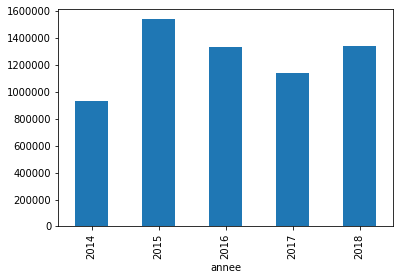

In [12]:
###calcul du nombre de comptage total par an depuis 2014 jusuqu'en 2018###

comptage_total = trains.groupby(['annee']).montants.sum()
comptage_total.plot(kind='bar')

## <div class="alert alert-info"> Formatage colonnes années et colonnes str to date </div> 

In [45]:
###Jour de comptage le plus important sur les 4 années
max_day = trains.groupby(['date_comptage','nom_gare','ligne'])['montants'].max()
max_day.sort_values(ascending=False).head(10)

date_comptage  nom_gare                ligne
2014-03-27     PARIS NORD              B        54137
2015-11-03     PARIS GARE DE LYON      D        49392
2018-10-11     PARIS NORD              H        46349
2016-10-04     HAUSSMANN SAINT-LAZARE  E        45752
2014-03-29     PARIS NORD              B        38283
2015-11-03     PARIS NORD              D        34512
2014-03-30     PARIS NORD              B        28956
2016-10-04     MAGENTA                 E        28695
2015-11-03     CHATELET LES HALLES     D        28586
2015-03-31     PARIS EST               P        27896
Name: montants, dtype: int64

# <div class="alert alert-block alert-success"> Etude des montants à la gare Paris Nord </div> 

In [16]:
###filtre de la DB pour avoir uniquement la gare du nord
pn = trains[trains['nom_gare']=='PARIS NORD']

In [17]:
###réinitialisation de index
pn = pn. reset_index()

In [35]:
pn.head()

,index,nom_gare,code_gare,type_jour,annee,date_comptage,ligne,tranche_horaire,montants
0,21,PARIS NORD,87271007,Samedi,2014,2014-03-29,B,06H-10H,16089
1,102,PARIS NORD,87271007,Dimanche,2015,2015-11-08,D,05H-06H,300
2,113,PARIS NORD,87271007,Samedi,2015,2015-11-07,D,05H-06H,624
3,209,PARIS NORD,87271007,Dimanche,2015,2015-11-08,D,16H-20H,16571
4,344,PARIS NORD,87271031,JOB,2018,2018-10-11,H,16H-20H,46349


## <div class="alert alert-info"> Evolution du nombre moyen de montants au cours d'une journée de semaine sur les 4 années - Gare du Nord </div> 

In [36]:
# sélection JOB
pn_job = pn[pn['type_jour']=='JOB']

In [37]:
#Sélection par nom de ligne
pn_job_lignes = pn_job.groupby(['ligne', 'tranche_horaire'], as_index=False)['montants'].mean()

In [38]:
pn_job_lignes.head()

,ligne,tranche_horaire,montants
0,B,05H-06H,1723
1,B,06H-10H,54137
2,B,10H-16H,35345
3,B,16H-20H,48989
4,B,20H-02H,14672


In [52]:
### heatmap
pn_job_lignes_heat = pn_job_lignes.set_index(['ligne', 'tranche_horaire'])
pn_job_lignes_heat = pn_job_lignes_heat.unstack()
pn_job_lignes_heat

montants                                    
tranche_horaire  05H-06H  06H-10H  10H-16H  16H-20H  20H-02H
ligne                                                       
B                 1723.0  54137.0  35345.0  48989.0  14672.0
D                  824.0  28073.0  19974.0  34512.0   7875.0
H                  451.0  10949.0  16567.0  46349.0  14286.0
K                    NaN    574.0    341.0   5786.0    548.0

In [22]:
q = pn_job_lignes.pivot(index='tranche_horaire', columns='ligne', values='montants')

In [23]:
q

ligne,B,D,H,K
tranche_horaire,,,,
05H-06H,1723.0,824.0,451.0,NaN
06H-10H,54137.0,28073.0,10949.0,574.0
10H-16H,35345.0,19974.0,16567.0,341.0
16H-20H,48989.0,34512.0,46349.0,5786.0
20H-02H,14672.0,7875.0,14286.0,548.0


In [24]:
q.reset_index(inplace=True)
q

ligne,tranche_horaire,B,D,H,K
0,05H-06H,1723.0,824.0,451.0,NaN
1,06H-10H,54137.0,28073.0,10949.0,574.0
2,10H-16H,35345.0,19974.0,16567.0,341.0
3,16H-20H,48989.0,34512.0,46349.0,5786.0
4,20H-02H,14672.0,7875.0,14286.0,548.0


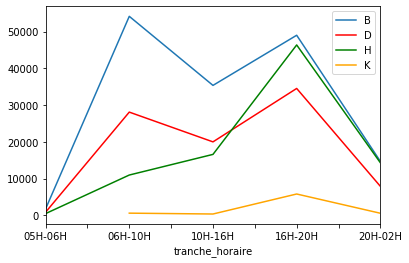

In [25]:
ax = plt.gca()

q.plot(kind='line',x='tranche_horaire',y='B',ax=ax)
q.plot(kind='line',x='tranche_horaire',y='D', color='red', ax=ax)
q.plot(kind='line',x='tranche_horaire',y='H', color='green', ax=ax)
q.plot(kind='line',x='tranche_horaire',y='K', color='orange', ax=ax)
plt.show()


## <div class="alert alert-info"> Evolution du nombre moyen de montants au cours d'une journée de week-end sur les 4 années - Gare du Nord </div> 

In [26]:
# sélection week end
pn_we = pn[(pn['type_jour']=='Samedi') | (pn['type_jour']=='Dimanche')]

In [27]:
pn_we.head()

,index,nom_gare,code_gare,type_jour,annee,date_comptage,ligne,tranche_horaire,montants
0,21,PARIS NORD,87271007,Samedi,2014,2014-03-29,B,06H-10H,16089
1,102,PARIS NORD,87271007,Dimanche,2015,2015-11-08,D,05H-06H,300
2,113,PARIS NORD,87271007,Samedi,2015,2015-11-07,D,05H-06H,624
3,209,PARIS NORD,87271007,Dimanche,2015,2015-11-08,D,16H-20H,16571
5,466,PARIS NORD,87271007,Dimanche,2014,2014-03-30,B,20H-02H,15375


In [28]:
#Sélection par nom de ligne
pn_we_lignes = pn_we.groupby(['ligne', 'tranche_horaire'], as_index=False)['montants'].mean()

In [29]:
pn_we_lignes.head()

,ligne,tranche_horaire,montants
0,B,05H-06H,1131.5
1,B,06H-10H,13271.5
2,B,10H-16H,33619.5
3,B,16H-20H,27963.0
4,B,20H-02H,17058.5


In [30]:
qwe = pn_we_lignes.pivot(index='tranche_horaire', columns='ligne', values='montants')

In [31]:
qwe

ligne,B,D,H,K
tranche_horaire,,,,
05H-06H,1131.5,462.0,301.5,NaN
06H-10H,13271.5,5469.5,3971.0,79.5
10H-16H,33619.5,20866.0,14800.0,221.0
16H-20H,27963.0,19338.5,16848.0,456.5
20H-02H,17058.5,8822.5,10483.5,145.5


In [32]:
qwe.reset_index(inplace=True)

In [33]:
qwe

ligne,tranche_horaire,B,D,H,K
0,05H-06H,1131.5,462.0,301.5,NaN
1,06H-10H,13271.5,5469.5,3971.0,79.5
2,10H-16H,33619.5,20866.0,14800.0,221.0
3,16H-20H,27963.0,19338.5,16848.0,456.5
4,20H-02H,17058.5,8822.5,10483.5,145.5


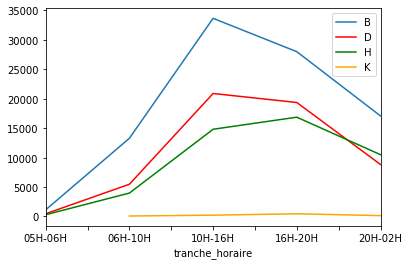

In [34]:
ax2 = plt.gca()

qwe.plot(kind='line',x='tranche_horaire',y='B',ax=ax2)
qwe.plot(kind='line',x='tranche_horaire',y='D', color='red', ax=ax2)
qwe.plot(kind='line',x='tranche_horaire',y='H', color='green', ax=ax2)
qwe.plot(kind='line',x='tranche_horaire',y='K', color='orange', ax=ax2)
plt.show()